In [34]:
import json
import re
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tweets_path = 'donald_data.json'
tweets_data = []
tweets_file = open(tweets_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweet['full_text'] = re.sub(r"http\S+", "", tweet['full_text'])
        if tweet['full_text'] != "":
            tweets_data.append(tweet)
    except:
        continue
tweets_data.reverse()
        
tweets_path = 'obama_data.json'
tweets_data_2 = []
tweets_file = open(tweets_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweet['full_text'] = re.sub(r"http\S+", "", tweet['full_text'])
        if tweet['full_text'] != "":
            tweets_data_2.append(tweet)
    except:
        continue
tweets_data_2.reverse()

tweets = pd.DataFrame(data=[tweet['full_text'] for tweet in tweets_data], columns=['Text'])
tweets['Time'] = np.array([tweet['created_at'] for tweet in tweets_data])
tweets['Likes'] = np.array([tweet['favorite_count'] for tweet in tweets_data])
tweets['RTs'] = np.array([tweet['retweet_count'] for tweet in tweets_data])

tweets_2 = pd.DataFrame(data=[tweet['full_text'] for tweet in tweets_data_2], columns=['Text'])
tweets_2['Time'] = np.array([tweet['created_at'] for tweet in tweets_data_2])
tweets_2['Likes'] = np.array([tweet['favorite_count'] for tweet in tweets_data_2])
tweets_2['RTs'] = np.array([tweet['retweet_count'] for tweet in tweets_data_2])

print(tweets_data_2[len(tweets_data_2)-1]['full_text'])

We will always remember everyone we lost on 9/11, thank the first responders who keep us safe, and honor all who defend our country and the ideals that bind us together. There's nothing our resilience and resolve can’t overcome, and no act of terror can ever change who we are.


[Text(0,0,''),
 Text(0,0,'Aug 04'),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'Sep 11')]

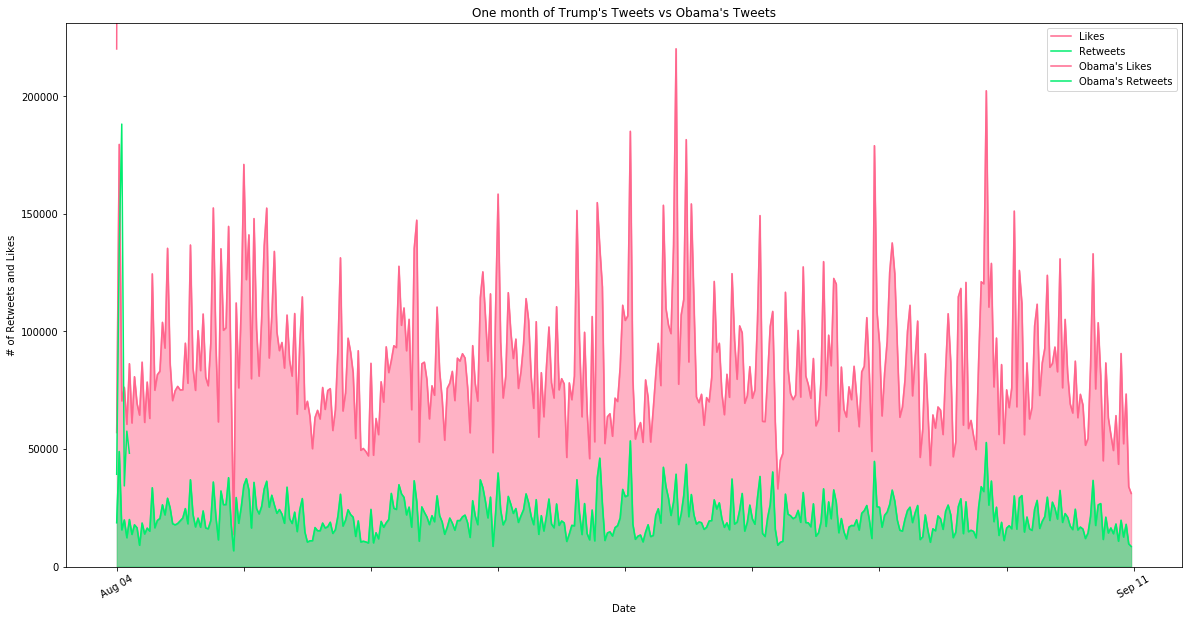

In [35]:
length = len(tweets_data)
likes = pd.Series(data=tweets[length-401:length-1]['Likes'].values, index=tweets[length-401:length-1]['Time'])
rt = pd.Series(data=tweets[length-401:length-1]['RTs'].values, index=tweets[length-401:length-1]['Time'])

length_2 = len(tweets_data_2)
likes_2 = pd.Series(data=tweets_2[length_2-7:length_2-1]['Likes'].values, index=tweets_2[length_2-7:length_2-1]['Time'])
rt_2 = pd.Series(data=tweets_2[length_2-7:length_2-1]['RTs'].values, index=tweets_2[length_2-7:length_2-1]['Time'])

plot = likes.plot(figsize=(20,10), color=(1, 0.40, 0.553), label='Likes', legend=True, title="One month of Trump's Tweets vs Obama's Tweets")
rt.plot(figsize=(20,10), color=(0, 0.93, .43), label='Retweets', legend=True)
likes.plot.area(color=(1, 0.40, 0.553), alpha=0.5)
rt.plot.area(color=(0, 0.93, .43), alpha=0.5)

likes_2.plot(figsize=(20,10), color=(1, 0.40, 0.553), label="Obama's Likes", legend=True)
rt_2.plot(figsize=(20,10), color=(0, 0.93, .43), label="Obama's Retweets", legend=True)
# likes_2.plot.area(color=(1, 0.40, 0.753), alpha=0.5)
# rt_2.plot.area(color=(0, 0.93, .63), alpha=0.5)

plot.set_ylabel("# of Retweets and Likes")
plot.set_xlabel("Date")
plot.set_xticklabels(['', 'Aug 04', '', '', '', '', '', '', '', 'Sep 11'], rotation = 30)

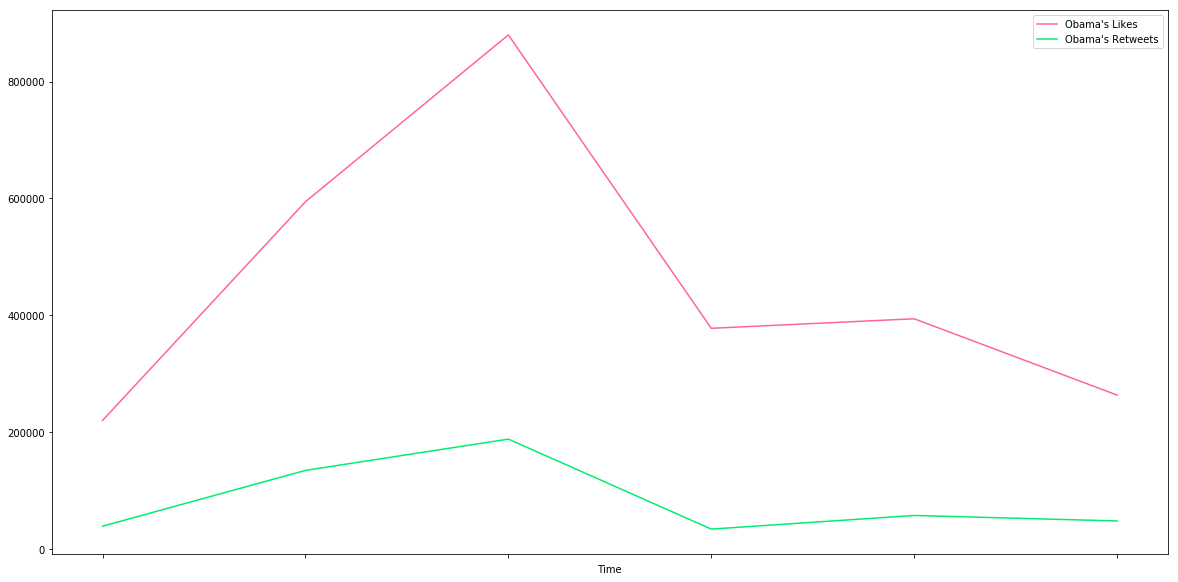

In [37]:
plot = likes_2.plot(figsize=(20,10), color=(1, 0.40, 0.553), label="Obama's Likes", legend=True)
rt_2.plot(figsize=(20,10), color=(0, 0.93, .43), label="Obama's Retweets", legend=True)
# likes_2.plot.area(color=(1, 0.40, 0.753), alpha=0.5)
# rt_2.plot.area(color=(0, 0.93, .63), alpha=0.5)

In [36]:
likes_max = np.max(tweets['Likes'])
rt_max = np.max(tweets['RTs'])
likes_index_max = tweets[tweets.Likes == likes_max].index[0]
rt_index_max  = tweets[tweets.RTs == rt_max].index[0]
likes_min = np.min(tweets['Likes'])
rt_min = np.min(tweets['RTs'])
likes_index_min = tweets[tweets.Likes ==likes_min].index[0]
rt_index_min  = tweets[tweets.RTs == rt_min].index[0]

print("The most liked Tweet, with {} likes: {}\n".format(tweets['Likes'][likes_index_max], tweets['Text'][likes_index_max]))
print("The most retweeted Tweet, with {} retweets: {}\n".format(tweets['RTs'][rt_index_max], tweets['Text'][rt_index_max]))
print("The least liked Tweet, with {} likes: {}\n".format(tweets['Likes'][likes_index_min], tweets['Text'][likes_index_min]))
print("The least retweeted Tweet, with {} retweets: {}\n".format(tweets['RTs'][rt_index_min], tweets['Text'][rt_index_min]))

The most liked Tweet, with 597274 likes: Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!

The most retweeted Tweet, with 255843 retweets: Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!

The least liked Tweet, with 2659 likes: @MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trade Deficits of more than 12 Trillion Dollars. Last year we had a Trade Deficit of almost 800 Billion Dollars. Bad policies &amp; leadership. Must win again!  #MAGA

The least retweeted Tweet, with 1114 retweets: @MarkBurnettTV @RealRomaDowney From Bush 1 to present, our Country has lost more than 55,000 factories, 6,000,000 manufacturing jobs and accumulated Trad